['2018-10-01' '2018-10-02' '2018-10-03' ... '2021-09-28' '2021-09-29'
 '2021-09-30']


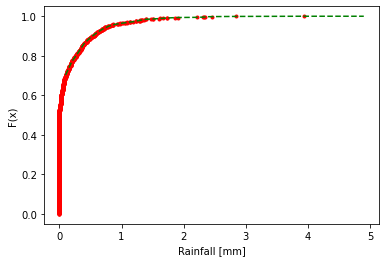

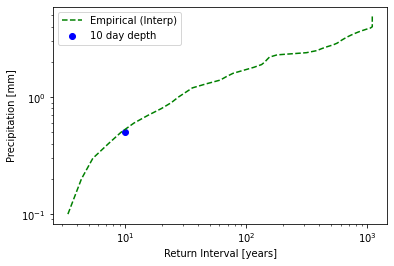

The 10-year storm has a depth of 0.5mm using an interpolated CDF


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# Data
Rain_input = pd.read_csv("Greasy_precipdata.csv")


day_input = np.arange('2018-10-01', '2021-10-01', dtype = 'datetime64[D]')
print(day_input)

# Sorted the Data
#corvo_df = pd.DataFrame(corvo_rain)

Rain_input_sort = Rain_input.sort_values(by=['ppt (inches)'], ascending = True)

# Reset the Indicies and then dropped the old index column
Rain_input_sort = Rain_input_sort.reset_index()
Rain_inputsort = Rain_input_sort.drop(columns = ['index'])

# added rank
Rain_inputsort['Rank'] = np.arange(1, len(day_input)+1)
rank = Rain_inputsort['Rank']
# Estimated the Empirical Distribution of the Rainfall (F(x))

F = np.empty(len(rank))
values = np.arange(len(rank))
for num in values:
    F[num] =(rank[num]/((len(rank))+1))

# Called all of the relevant variables
Rain_inputsort["F(x)"] = F
F_x = Rain_inputsort["F(x)"]
days = Rain_inputsort["Date"]
rank = Rain_inputsort["Rank"]
daily_rain = Rain_inputsort["ppt (inches)"]

#print(corvo_df_sort["F(x)"].head(99))
# Utilized Interp CDF
## First needed to get the x coordinates, and for this got the max and min values for precipitation
rainmin, rainmax =daily_rain.min(), daily_rain.max()


## generated x values going from 500 to 2000
Precip_eval = np.arange(.1,5,.1)
## used np.interp to return the linear interpolation for further estimation
pptInterpCDF = np.interp(Precip_eval,daily_rain,F_x)

fig4 = plt.figure()
ax4_1 = fig4.add_subplot(111)
# ax4_1.scatter,F_x, color ="tab:red", label = "observed")
ax4_1.plot(daily_rain,F_x,'r.')
ax4_1.plot(Precip_eval,pptInterpCDF,'g--')
ax4_1.set_xlabel('Rainfall [mm]')
ax4_1.set_ylabel('F(x)')


# Solve for the RI using Interp method
pptDay = 10 # Storm event? How many days?
RI_interp = 1/(1-pptInterpCDF)
fig4_2 = plt.figure()
ax4_2 = fig4_2.add_subplot(111)
ax4_2.plot(RI_interp,Precip_eval,'g--',label='Empirical (Interp)')
ax4_2.scatter(10,Precip_eval[np.argmin((RI_interp-pptDay)**2)], color = 'b', label = '10 day depth')
ax4_2.set_yscale('log')
ax4_2.set_xscale('log')
ax4_2.set_xlabel("Return Interval [years]")
ax4_2.set_ylabel("Precipitation [mm]")
ax4_2.legend()
plt.show()
print('The %d-year storm has a depth of %.1fmm using an interpolated CDF' % (
    pptDay, Precip_eval[np.argmin((RI_interp-pptDay)**2)]))
